# Final Script

### This file shows COVID-19 prediction using Linear Regression,Polynomial Regression and Support Vector Regression. Future Forecasting using Poly-Regression and SVR regression is shown but it's not correct. For LSTM implementation see COVID_LSTM script but open it from TensorFlow environment to run.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline


In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,44443,44503,44706,44988,45280,45490,45716,45839,45966,46215
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,68768,70254,71644,73196,75007,76727,78493,80429,81890,83585
267,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2090,2093,2099,2107,2114,2124,2137,2148,2160,2177
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17373,17394,17424,17454,17466,17535,17553,17569,17589,17608


In [3]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1661,1675,1687,1695,1712,1725,1737,1740,1752,1763
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,672,685,699,716,735,743,753,771,787,798
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,334,336,337,337,338,340,341,342,345,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,606,620,636,645,656,665,680,689,704,717
267,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,608,608,608,609,609,611,612,614,615,617
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,356,356,357,357,357,357,357,357,357,357


In [4]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,35370,35422,35934,35976,36122,36145,36232,36295,36709,36731
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,15055,15469,15842,16230,16666,17031,17352,17755,18152,18481
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,47581,48183,48794,49421,50070,50712,51334,51946,52568,53204
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,5239,5290,5358,5405,5503,5542,5649,5710,5710,5794
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,7117,7273,7346,7351,7444,7517,7617,7697,7763,7763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,57879,58383,59021,59538,60009,60499,61241,61960,62944,63834
252,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
253,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1434,1441,1448,1459,1467,1474,1484,1491,1498,1504
254,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16606,16659,16701,16701,16707,16755,16779,16845,16925,16983


In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-13-2020.csv')
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-14 04:26:00,33.939110,67.709953,38716,1420,31638,5658.0,Afghanistan,99.454534,3.667734
1,NaN,NaN,NaN,Albania,2020-09-14 04:26:00,41.153300,20.168300,11353,334,6569,4450.0,Albania,394.502745,2.941954
2,NaN,NaN,NaN,Algeria,2020-09-14 04:26:00,28.033900,1.659600,48254,1612,34037,12605.0,Algeria,110.040712,3.340656
3,NaN,NaN,NaN,Andorra,2020-09-14 04:26:00,42.506300,1.521800,1344,53,943,348.0,Andorra,1739.468064,3.943452
4,NaN,NaN,NaN,Angola,2020-09-14 04:26:00,-11.202700,17.873900,3388,134,1301,1953.0,Angola,10.308441,3.955136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,NaN,NaN,NaN,West Bank and Gaza,2020-09-14 04:26:00,31.952200,35.233200,30574,221,20082,10271.0,West Bank and Gaza,599.323796,0.722836
3951,NaN,NaN,NaN,Western Sahara,2020-09-14 04:26:00,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3952,NaN,NaN,NaN,Yemen,2020-09-14 04:26:00,15.552727,48.516388,2011,583,1212,216.0,Yemen,6.742447,28.990552
3953,NaN,NaN,NaN,Zambia,2020-09-14 04:26:00,-13.133897,27.849332,13539,312,12260,967.0,Zambia,73.645738,2.304454


In [6]:
latest_data = latest_data.dropna()
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
632,1001.0,Autauga,Alabama,US,2020-09-14 04:26:00,32.539527,-86.644082,1567,23,0,1419.0,"Autauga, Alabama, US",2581.037785,1.595007
633,1003.0,Baldwin,Alabama,US,2020-09-14 04:26:00,30.727750,-87.722071,4934,43,0,4738.0,"Baldwin, Alabama, US",2141.698845,0.899393
634,1005.0,Barbour,Alabama,US,2020-09-14 04:26:00,31.868263,-85.387129,796,7,0,615.0,"Barbour, Alabama, US",2519.646763,1.125402
635,1007.0,Bibb,Alabama,US,2020-09-14 04:26:00,32.996421,-87.125115,599,6,0,572.0,"Bibb, Alabama, US",2581.048495,1.038062
636,1009.0,Blount,Alabama,US,2020-09-14 04:26:00,33.982109,-86.567906,1483,13,0,1108.0,"Blount, Alabama, US",1938.574344,1.159679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,56037.0,Sweetwater,Wyoming,US,2020-09-14 04:26:00,41.659439,-108.882788,318,2,0,316.0,"Sweetwater, Wyoming, US",751.009612,0.628931
3897,56039.0,Teton,Wyoming,US,2020-09-14 04:26:00,43.935225,-110.589080,470,1,0,469.0,"Teton, Wyoming, US",2003.068531,0.212766
3898,56041.0,Uinta,Wyoming,US,2020-09-14 04:26:00,41.287818,-110.547578,311,2,0,309.0,"Uinta, Wyoming, US",1537.624839,0.643087
3900,56043.0,Washakie,Wyoming,US,2020-09-14 04:26:00,43.904516,-107.680187,111,6,0,105.0,"Washakie, Wyoming, US",1422.165279,5.405405


In [7]:
# World map showing all confirmed cases till date


import folium
import branca.colormap as cm

def get_center_latlong(confirmed_cases):
    # get the center of my map for plotting
    centerlat = (confirmed_cases['Lat'].max() + confirmed_cases['Lat'].min()) / 2
    centerlong = (confirmed_cases['Long'].max() + confirmed_cases['Long'].min()) / 2
    return centerlat, centerlong


# grab the center of our map using our cool function
center = get_center_latlong(confirmed_cases)

# create a new map object
m = folium.Map(location=center, zoom_start=1.5)

# go through each home in set, make circle, and add to map.
for i in range(len(confirmed_cases)):
    folium.Circle(
        location=[confirmed_cases.iloc[i]['Lat'], confirmed_cases.iloc[i]['Long']],
        radius=10,
    ).add_to(m)
    
m
m.save('world_cases.html')                                                               

ModuleNotFoundError: No module named 'folium'

In [8]:
# Map showing confirmed cases in USA till date


import folium
import branca.colormap as cm

def get_center_latlong(latest_data):
    # get the center of my map for plotting
    centerlat = (latest_data['Lat'].max() + latest_data['Lat'].min()) / 2
    centerlong = (latest_data['Long_'].max() + latest_data['Long_'].min()) / 2
    return centerlat, centerlong


# grab the center of our map using our cool function
center = get_center_latlong(latest_data)

# create a new map object
m = folium.Map(location=center, zoom_start=10)

# go through each home in set, make circle, and add to map.
for i in range(len(latest_data)):
    folium.Circle(
        location=[latest_data.iloc[i]['Lat'], latest_data.iloc[i]['Long_']],
        radius=10,
    ).add_to(m)
    

m  
#m.save('USA_cases.html')  

In [9]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/27/20', '10/28/20', '10/29/20', '10/30/20', '10/31/20', '11/1/20',
       '11/2/20', '11/3/20', '11/4/20', '11/5/20'],
      dtype='object', length=293)

In [10]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

date_short = confirmed_cases.loc[:, cols[4]:cols[-78]]
date_short

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20
0,0,0,0,0,0,0,0,0,0,0,...,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856
1,0,0,0,0,0,0,0,0,0,0,...,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967
2,0,0,0,0,0,0,0,0,0,0,...,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258
3,0,0,0,0,0,0,0,0,0,0,...,963,977,981,989,989,989,1005,1005,1024,1024
4,0,0,0,0,0,0,0,0,0,0,...,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,0,0,0,0,0,0,0,...,14875,15184,15491,15834,16153,16534,16844,17306,17606,17989
264,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,0,0,0,0,0,0,0,0,0,0,...,1831,1841,1847,1858,1858,1869,1882,1889,1892,1899
266,0,0,0,0,0,0,0,0,0,0,...,8275,8501,8663,9021,9186,9343,9839,9981,10218,10372


In [11]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/27/20', '10/28/20', '10/29/20', '10/30/20', '10/31/20', '11/1/20',
       '11/2/20', '11/3/20', '11/4/20', '11/5/20'],
      dtype='object', length=289)

In [12]:
# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []
brazil_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []
brazil_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []
brazil_recoveries = []

In [13]:
for i in dates:
    confirmed_sum = confirmed[i].sum()                # sum of all confirmed data
    death_sum = deaths[i].sum()                       # sum of all deaths data
    recovered_sum = recoveries[i].sum()               # sum of all recoveries data
    
    world_cases.append(confirmed_sum)                 # add confirmed summed data to world_cases []
    total_deaths.append(death_sum)                    # add deaths summed data to total_deaths []
    total_recovered.append(recovered_sum)             # add recoveries summed data to  total_recovered []
    total_active.append(confirmed_sum-death_sum-recovered_sum)        # total_active = confirmed_sum - death_sum
    
    mortality_rate.append(death_sum/confirmed_sum)         # mortality_rate = death_sum/confirmed_sum
    recovery_rate.append(recovered_sum/confirmed_sum)      # recovery_rate = recovered_sum/confirmed_sum
    
    # confirmed country covid cases of all countries
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())          # total cases reported in USA
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())      
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    brazil_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Brazil'][i].sum())
    
    # reported total deaths of all countries
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    brazil_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Brazil'][i].sum())

    # reported recoveries of all countries
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
    brazil_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Brazil'][i].sum())

In [14]:
# no. of days since 01/22, world cases, total deaths, total recoveries until today
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)       # no. of days since start date of dataset(exclude future dates)     
#world_cases = np.array(world_cases).reshape(-1, 1)
#total_deaths = np.array(total_deaths).reshape(-1, 1)
#total_recovered = np.array(total_recovered).reshape(-1, 1)


In [15]:
# keeping track of dates to forecast

days_in_future = 7
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)   # days including future 20 days
adjusted_dates = future_forecast[:-7]   


In [16]:

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')   # 2020-01-22 00:00:00

future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

normal_date = future_forecast_dates[:-7]                          

In [17]:

df = pd.DataFrame(list(zip(normal_date, world_cases, total_deaths, total_recovered)), 
               columns =['Date', 'cases', 'deaths', 'recovered']) 

df
#w = world_cases.tolist()
#td = total_deaths.tolist()
#tr = total_recovered.tolist()
#x = normal_date

,Date,cases,deaths,recovered
0,01/22/2020,555,17,28
1,01/23/2020,654,18,30
2,01/24/2020,941,26,36
3,01/25/2020,1434,42,39
4,01/26/2020,2118,56,52
...,...,...,...,...
284,11/01/2020,46502095,1200098,31078260
285,11/02/2020,47011161,1206168,31357886
286,11/03/2020,47493178,1214178,31609242
287,11/04/2020,48090690,1225202,31889030


C:\Users\Soumyashree Sahoo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Blue : Confirmed Cases 
Red : Death Cases 
Green : Recovered Cases 


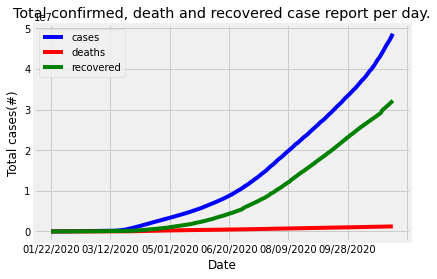

In [18]:
# Line graph that illustrates increasing infections cases per day.

x = df.Date
y = df.cases
y1 = df.deaths
y2 = df.recovered
ax = plt.gca()

plt.rcParams['figure.figsize'] = (8, 6)

df.plot(kind='line', x='Date',
                          y='cases', color='blue', ax=ax)
df.plot(kind='line', x='Date',
                          y='deaths', color='red', ax=ax)
df.plot(kind='line', x='Date',
                          y='recovered', color='green', ax=ax)
print("Blue : Confirmed Cases ")
print("Red : Death Cases ")
print("Green : Recovered Cases ")

plt.ylabel('Total cases(#)')
plt.title('Total confirmed, death and recovered case report per day.')

plt.show()

In [19]:
df

,Date,cases,deaths,recovered
0,01/22/2020,555,17,28
1,01/23/2020,654,18,30
2,01/24/2020,941,26,36
3,01/25/2020,1434,42,39
4,01/26/2020,2118,56,52
...,...,...,...,...
284,11/01/2020,46502095,1200098,31078260
285,11/02/2020,47011161,1206168,31357886
286,11/03/2020,47493178,1214178,31609242
287,11/04/2020,48090690,1225202,31889030


In [20]:
# Now, Let's prepare the data for the prediction.
# I am converting Date column of dataset to numeric for ensuring the independent variable should be on the same scale as other.
# In the date, I assume the start date as 0 (first day) when the COVID-19 had started and increasing by 1 over increament in date.
# Splitting corona data into Date and confirmed cases.

corona_index_df = pd.DataFrame(df.index)
corona_confirmed_df = pd.DataFrame(df.cases)
corona_death_df = pd.DataFrame(df.deaths)
corona_recovered_df = pd.DataFrame(df.recovered)

## Linear-Polynomial Regression 

In [53]:
####################################
## Prepare dataset for model      ##
###################################

# Splitting the data.
# Here, I am preparing the train, validate and test dataset.
# Using 90% of the data to train the model.

# days
x_days_train = corona_index_df[0:78]
x_days_validate = corona_index_df[78:82]
x_days_test = corona_index_df[82:90]

# Confirmed (cases)
y_confirmed_train = corona_confirmed_df[0:78]
y_confirmed_validate = corona_confirmed_df[78:82]
y_confirmed_test = corona_confirmed_df[82:90]


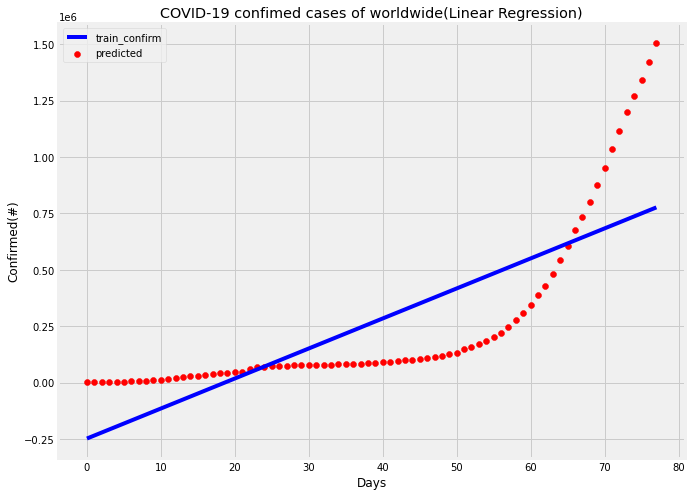

In [54]:
####################################
##  Regression Model             ##
###################################

# Let's apply Linear regression model on the dataset. As I can see, all the data are continuous, I think that Linear regression will be perfect.
# Linear regression
ln_model = LinearRegression()
ln_model.fit(x_days_train, y_confirmed_train)

plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, ln_model.predict(x_days_train), color='blue')
plt.title('COVID-19 confimed cases of worldwide(Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed(#)')
plt.legend(['train_confirm','predicted'], prop={'size': 10})
plt.show()

In [55]:
# # After applying the linear regression, I can see the predicted line do not fit with the independent variables.
# # It means that the line is unable to capture the patterns in the data.This may be an example of under-fitting.
# # For confirmation, lets check the rmse and r2 score for the model.
print('Linear Regession  R2 Score   : ',
      r2_score(y_confirmed_train, ln_model.predict(x_days_train)))
rmse = np.sqrt(mean_squared_error(
    y_confirmed_train, ln_model.predict(x_days_train)))
print('RMSE of Linear regression is :', rmse)

Linear Regession  R2 Score   :  0.6178243702965636
RMSE of Linear regression is : 235624.69462361548


R2 score is 61%. It means that 61% of variance is covered by the model. Now, to overcome the under-fitting problem, I have to increase the complexity of the model. Here, I have used Polynomial linear regression technique because it best fit for the prediction of how diceases spread accross the territory or the world. Polynomial linear regression to predict future confirmed cases.

In [56]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=10)

# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
poly_future_forecast = poly_reg.fit_transform(future_forecast)    # fitting model using all dates including future 7 days

# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)

test_linear_pred = lin_reg.predict(x_poly)
linear_pred = lin_reg.predict(poly_future_forecast)      # # linear prediction cases no. prediction using future_forecast

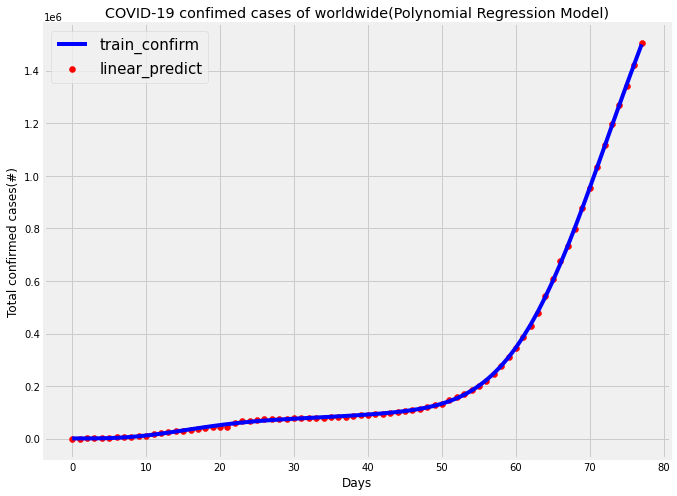

In [57]:
# Graphical summary of the model.
plt.rcParams['figure.figsize'] = (10, 8)

plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')

plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases(#)')
plt.legend(['train_confirm','linear_predict'], prop={'size': 15})
plt.show()

It seems that the polynomial line connects all the dots. Now, let's validate the model with the x_days_validate which contains index. For the index, the model will predict the confirmed cases of the data.

In [58]:
y_pred = lin_reg.predict(poly_reg.fit_transform(x_days_validate))
result = pd.DataFrame(y_pred)
result['Real Value'] = y_confirmed_validate.iloc[:, :].values
result['Predicted Value'] = pd.DataFrame(y_pred)
result = result[['Real Value', 'Predicted Value']]
result

,Real Value,Predicted Value
0,1590779,1.574394e+06
1,1678319,1.650042e+06
2,1754535,1.728869e+06
3,1849888,1.814318e+06


In [59]:
# Now, as per the model,let's check the accuracy of the model on validate data set.
print('Polynomial Regession  R2 Score   : ', r2_score(y_confirmed_validate, y_pred))

rmse = np.sqrt(mean_squared_error(y_confirmed_validate, y_pred))

print('RMSE of polynomial regression is :', rmse)

Polynomial Regession  R2 Score   :  0.918002206574806
RMSE of polynomial regression is : 27349.457583358402


R2 score is 91%. It means that 91% of variance is covered by the model. Now, to overcome the under-fitting problem, I have to increase the complexity of the model. Here, I have used Polynomial linear regression technique because it best fit for the prediction of how diceases spread accross the territory or the world. Polynomial linear regression to predict future confirmed cases.

In [60]:
# However, let's apply the accurate model for test data.

y_confirmed_test_pred = lin_reg.predict(poly_reg.fit_transform(x_days_test))
predicted_result = pd.DataFrame(y_confirmed_test_pred)
predicted_result['Real Test Value'] = y_confirmed_test.iloc[:, :].values
predicted_result['Predicted Test Value'] = pd.DataFrame(y_confirmed_test_pred)
predicted_result = predicted_result[[
    'Real Test Value', 'Predicted Test Value']]
print(predicted_result)

   Real Test Value  Predicted Test Value
0          1920033          1.911292e+06
1          1991379          2.026491e+06
2          2073252          2.168804e+06
3          2170173          2.349766e+06
4          2257986          2.584068e+06
5          2331380          2.890148e+06
6          2411352          3.290851e+06
7          2485855          3.814185e+06


## Support Vector Regression 

In [79]:
# svm_confirmed = svm_search.best_estimator_

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)    # SVM model created
svm_confirmed.fit(x_days_train, y_confirmed_train)                  # fitting SVM model using X_train & y_train

#svm_confirmed.predict(x_days_train)
svm_pred = svm_confirmed.predict(future_forecast)                        # predict SVM using future_forecast

svm_test_pred = svm_confirmed.predict(x_days_test)

C:\Users\Soumyashree Sahoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


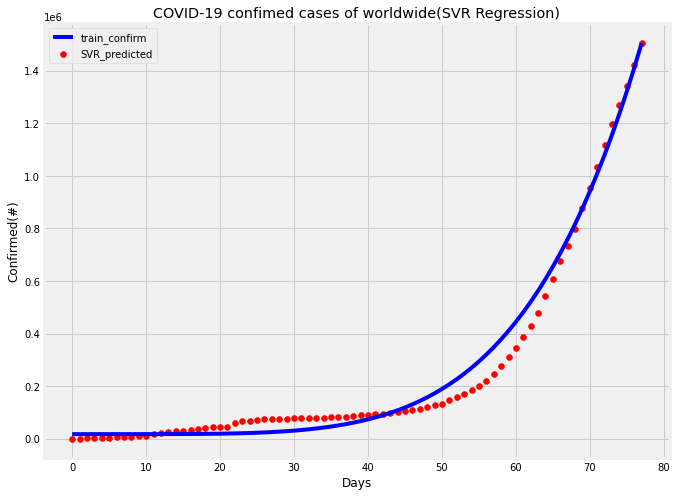

In [80]:
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, svm_confirmed.predict(x_days_train), color='blue')
plt.title('COVID-19 confimed cases of worldwide(SVR Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed(#)')
plt.legend(['train_confirm','SVR_predicted'], prop={'size': 10})
plt.show()

It seems that the  line doesn't connects all the dots. Now, let's validate the model with the x_days_validate which contains index. For the index, the model will predict the confirmed cases of the data.

In [81]:
# # After applying the SVR regression, I can see the predicted line do not fit with the independent variables.
# # It means that the line is unable to capture the patterns in the data.This may be an example of under-fitting.
# # For confirmation, lets check the rmse and r2 score for the model.
print('SVR Regession  R2 Score   : ',
      r2_score(y_confirmed_train, svm_confirmed.predict(x_days_train)))
rmse = np.sqrt(mean_squared_error(-
    y_confirmed_train, svm_confirmed.predict(x_days_train)))
print('RMSE of SVR regression is :', rmse)

SVR Regession  R2 Score   :  0.9854596949082278
RMSE of SVR regression is : 933808.7487645024


It seems that polynomial line doesn't connect all of the dots. Now let's validate the model with  the x_days_validate which contains index. For the index, the model will predict the confirmed cases of the data.

In [83]:
y_pred = svm_confirmed.predict(x_days_validate)
result = pd.DataFrame(y_pred)
result['Real Value'] = y_confirmed_validate.iloc[:, :].values
result['Predicted Value'] = pd.DataFrame(y_pred)
result = result[['Real Value', 'Predicted Value']]
result

,Real Value,Predicted Value
0,1590779,1.603399e+06
1,1678319,1.707713e+06
2,1754535,1.817446e+06
3,1849888,1.932805e+06


In [84]:
# Now, as per the model,let's check the accuracy of the model on validate data set.
print('SVR Regession  R2 Score   : ', r2_score(y_confirmed_validate, y_pred))
rmse = np.sqrt(mean_squared_error(y_confirmed_validate, y_pred))

print('RMSE of SVR regression is :', rmse)

SVR Regession  R2 Score   :  0.6750684391261982
RMSE of SVR regression is : 54443.19239296221


R2 score is 67%. It means that 67% of variance is covered by the model. 

In [75]:
# However, let's apply the accurate model for test data.

y_confirmed_test_pred = svm_confirmed.predict(x_days_test)
predicted_result = pd.DataFrame(y_confirmed_test_pred)
predicted_result['Real Test Value'] = y_confirmed_test.iloc[:, :].values
predicted_result['Predicted Test Value'] = pd.DataFrame(y_confirmed_test_pred)
predicted_result = predicted_result[[
    'Real Test Value', 'Predicted Test Value']]
print(predicted_result)

   Real Test Value  Predicted Test Value
0          1920033          2.054003e+06
1          1991379          2.181259e+06
2          2073252          2.314799e+06
3          2170173          2.454851e+06
4          2257986          2.601651e+06
5          2331380          2.755441e+06
6          2411352          2.916466e+06
7          2485855          3.084979e+06


# Future Forecasting

In [68]:
# Future predictions using polynomial regression

linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forecast_dates[-7:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-7:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,11/06/2020,110572925962798.000000
1,11/07/2020,115062492057973.000000
2,11/08/2020,119715146875888.000000
3,11/09/2020,124536125709926.000000
4,11/10/2020,129530810052522.000000
5,11/11/2020,134704731074591.000000
6,11/12/2020,140063573173565.000000


In [69]:
# Future predictions using SVM 

svm_df = pd.DataFrame({'Date': future_forecast_dates[-7:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-7:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,11/06/2020,1107538058.000000
1,11/07/2020,1126832381.000000
2,11/08/2020,1146394675.000000
3,11/09/2020,1166227723.000000
4,11/10/2020,1186334326.000000
5,11/11/2020,1206717303.000000
6,11/12/2020,1227379494.000000


In [70]:

def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(10,6 ))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=10)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()
    

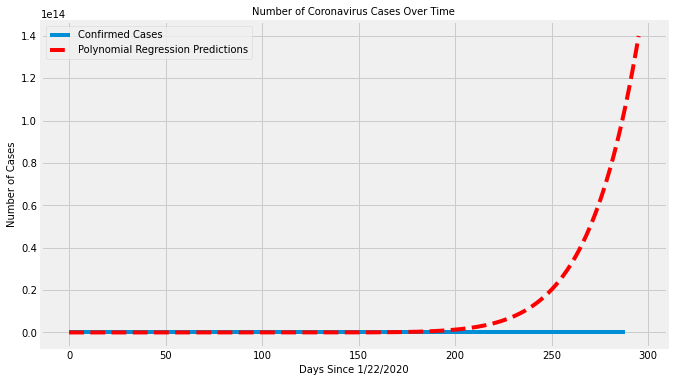

In [71]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')     # plot with poly. regression without future forecast dates

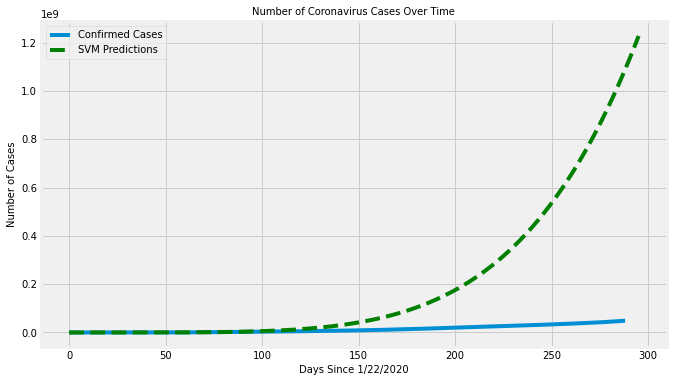

In [72]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')     # using SVM without future forecast dates